In [ ]:
from rubin_sim import maf
from rubin_sim.maf.run_comparison import archive
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(
    {
        "text.usetex": True,
        # "font.family": "Helvetica",
        "font.family": "serif",
        "mathtext.fontset": "cm",
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "font.size": 11,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "ytick.right": True,
        "xtick.top": True,
        # "xtick.major.size": 6,
        # "ytick.major.size": 6,
        # "xtick.minor.size": 4,
        # "ytick.minor.size": 4,
    }
)

In [181]:
# we can use the operations simulation results to look at planned LSST surveys,
# some have already been run, and usually take time
families = maf.get_family_descriptions()

In [182]:
# we can show the families, which organizes the opsim runs by their survey strategy
# then within each family, we can see the opsim runs that are part of that family
families

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2-v3 baseline simulations....,--,baseline_v2.1_10yrs,"[baseline_v3.0_10yrs, baseline_v2.2_10yrs, bas...",[V3 baseline simulation. This is the same as d...,"[fbs_3.0/baseline/baseline_v3.0_10yrs.db, fbs_...",[https://s3df.slac.stanford.edu/data/rubin/sim...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,"[noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...","[v2.0 baseline with no rolling, Rolling half-s...","[fbs_2.0/noroll/noroll_v2.0_10yrs.db, fbs_2.0/...",[https://s3df.slac.stanford.edu/data/rubin/sim...
rolling v2,**rolling v2** : This updates on the rolling f...,2.2,baseline_v2.2_10yrs,"[noroll_v2.2_10yrs, rolling_ns2_strength0.50v2...","[No rolling cadence, 2 band rolling cadence at...","[fbs_2.2/rolling/noroll_v2.2_10yrs.db, fbs_2.2...",[https://s3df.slac.stanford.edu/data/rubin/sim...
triplets,**triplets** : These simulations add a third v...,2.0,baseline_v2.0_10yrs,"[presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...","[Triples spaced 1.5 hours apart g+r,r+i,i+z in...","[fbs_2.0/presto/presto_gap1.5_v2.0_10yrs.db, f...",[https://s3df.slac.stanford.edu/data/rubin/sim...
long gaps no pairs,**long gaps no pairs** : The baseline survey s...,2.0,baseline_v2.0_10yrs,[long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...,[Long gaps pairs every 7 nights starting after...,[fbs_2.0/long_gaps_nopair/long_gaps_np_nightso...,[https://s3df.slac.stanford.edu/data/rubin/sim...
bluer balance,**bluer balance** : The standard filter balanc...,2.0,baseline_v2.0_10yrs,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[fbs_2.0/bluer/bluer_indx0_v2.0_10yrs.db, fbs_...",[https://s3df.slac.stanford.edu/data/rubin/sim...
longer u visits,**longer u visits** : The baseline survey uses...,2.0,baseline_v2.0_10yrs,"[long_u1_v2.0_10yrs, long_u2_v2.0_10yrs]","[u band visits 1x50s, number of u visits same ...","[fbs_2.0/long_u/long_u1_v2.0_10yrs.db, fbs_2.0...",[https://s3df.slac.stanford.edu/data/rubin/sim...
vary nes,**vary nes** : These simulations investigate t...,2.0,baseline_v2.0_10yrs,"[vary_nes_nesfrac0.01_v2.0_10yrs, vary_nes_nes...","[NES at 1% WFD level, NES at 5% WFD level, NES...",[fbs_2.0/vary_nes/vary_nes_nesfrac0.01_v2.0_10...,[https://s3df.slac.stanford.edu/data/rubin/sim...
vary gp,**vary gp** : These simulations investigate th...,2.0,baseline_v2.0_10yrs,"[vary_gp_gpfrac0.01_v2.0_10yrs, vary_gp_gpfrac...","[Dusty plane at 1% WFD level, Dusty plane at 5...",[fbs_2.0/vary_gp/vary_gp_gpfrac0.01_v2.0_10yrs...,[https://s3df.slac.stanford.edu/data/rubin/sim...


In [183]:
# here is the baseline simulation, which has the different opsim runs
maf.describe_families(families.loc[["baseline", "technical"]])

---
**baseline** : The v2-v3 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages. v3 changes the GP footprint, adds more time in the DDFs (7%) and adds a near-sun twilight microsurvey, as well as adding third visits per night every 7 nights.  
**version**: --  
**runs**:  


,brief,filepath
run,,
baseline_v3.0_10yrs,"V3 baseline simulation. This is the same as draft2_rw0.9_uz_v2.99_10yrs, which was adopted as the baseline simulation in the SCOC Phase 2 deliberations (see PSTN-055). It includes a two-region rolling cadence with weight 0.9, a connected galactic plane region, the DDFs at 7% of survey time, and a full strength near-sun twilight microsurvey. Filters swap between u/z during dark/bright time.",fbs_3.0/baseline/baseline_v3.0_10yrs.db
baseline_v2.2_10yrs,v2.2 baseline (prescheduled DDFs),fbs_2.2/baseline/baseline_v2.2_10yrs.db
baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",fbs_2.1/baseline/baseline_v2.1_10yrs.db
baseline_v2.0_10yrs,v2.0 baseline,fbs_2.0/baseline/baseline_v2.0_10yrs.db
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,fbs_2.0/retro/baseline_retrofoot_v2.0_10yrs.db
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),fbs_2.0/retro/retro_baseline_v2.0_10yrs.db


---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


,brief,filepath
run,,
march_start_v2.1_10yrs,Start the survey in March 2022,fbs_2.1/technical/march_start/march_start_v2.1_10yrs.db


(None, None)

In [184]:
from os.path import splitext, basename
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline


baseline_run_path = "/home/fabg/rubin_sim_data/sim_baseline/baseline_v4.3.1_10yrs.db"
print(baseline_run_path)
baseline_run_name = splitext(basename(baseline_run_path))[0]
baseline_run_name

/home/fabg/rubin_sim_data/sim_baseline/baseline_v4.3.1_10yrs.db


'baseline_v4.3.1_10yrs'

In [185]:
# we can look at the depth in y filter

filter_constraint = "filter = 'y'"
slicer = maf.HealpixSlicer(nside=64)
magnitude_5sig_metric = maf.Coaddm5Metric()
data_dir = "./"

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


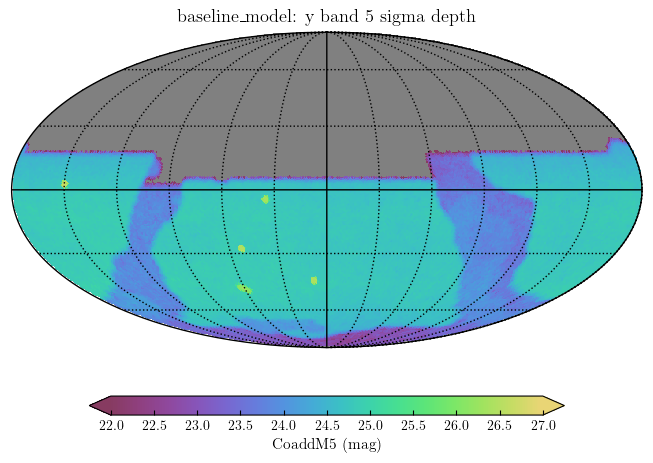

In [186]:
# bg.plot_all(closefigs=False)
base_bundle_mag = maf.MetricBundle(
    magnitude_5sig_metric,
    slicer,
    filter_constraint,
    run_name=baseline_run_name,
)
bg = maf.MetricBundleGroup([base_bundle_mag], baseline_run_path, out_dir=data_dir)
bg.run_all()
ph = maf.PlotHandler(out_dir=data_dir, thumbnail=False, fig_format="png")
ph.set_metric_bundles([base_bundle_mag])
plot_dict = {
    "color_min": 22,
    "color_max": 27,
    "extend": "both",
    "title": "baseline_model: y band 5 sigma depth",
}

fig = ph.plot(plot_func=maf.HealpixSkyMap(), plot_dicts=plot_dict)
plt.savefig("baseline_depth_y.png", dpi=300, bbox_inches="tight")
plt.show()

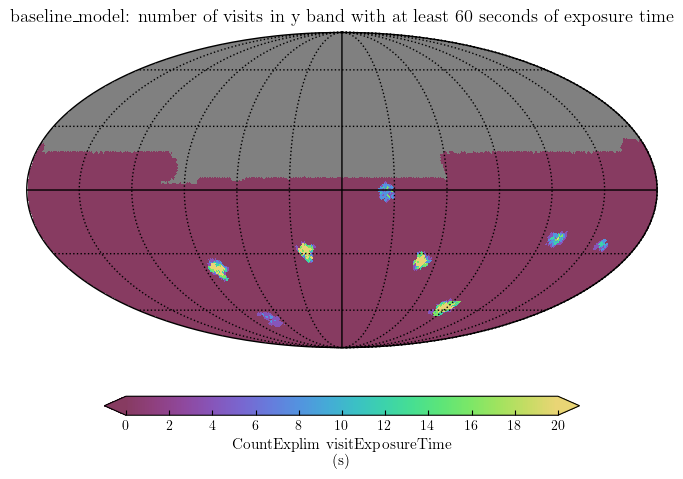

In [187]:
# now do the samee but for the counts
# number of visits with at least 60 seconds of exposure time
seconds_visited_metric = maf.CountExplimMetric(min_exp=60.0)
base_bundle_mag = maf.MetricBundle(
    seconds_visited_metric,
    slicer,
    filter_constraint,
    run_name=baseline_run_name,
)
bg = maf.MetricBundleGroup([base_bundle_mag], baseline_run_path, out_dir=data_dir)
bg.run_all()

ph = maf.PlotHandler(out_dir=data_dir, thumbnail=False, fig_format="png")
ph.set_metric_bundles([base_bundle_mag])

plot_dict = {
    "extend": "both",
    "title": "baseline_model: number of visits in y band with at least 60 seconds of exposure time",
    "color_min": 0,
    "color_max": 20,
}
fig = ph.plot(plot_func=maf.HealpixSkyMap(), plot_dicts=plot_dict)
plt.savefig("y_60s.png", dpi=300, bbox_inches="tight")
plt.show()

## QSO event estimator

/home/fabg/venvs/python311/lib/python3.11/site-packages/rubin_sim/maf/slicers/base_spatial_slicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set use_cache=False in slicer.
  warnings.warn(
/home/fabg/venvs/python311/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:46: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


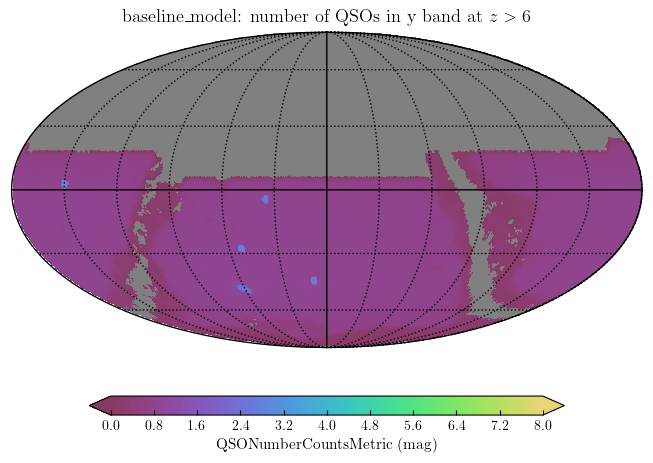

In [188]:
# count QSOs detected in y filter with a redshift of 6 or greater
qsos_metric = maf.QSONumberCountsMetric(lsst_filter="y", zmin=6)
base_bundle_mag = maf.MetricBundle(
    qsos_metric,
    slicer,
    "filter = 'y'",
    run_name=baseline_run_name,
)
bg = maf.MetricBundleGroup([base_bundle_mag], baseline_run_path, out_dir=data_dir)
bg.run_all()

ph = maf.PlotHandler(out_dir=data_dir, thumbnail=False, fig_format="png")
ph.set_metric_bundles([base_bundle_mag])

plot_dict = {
    "extend": "both",
    "title": "baseline_model:  number of QSOs in y band at $z > 6$",
    "color_min": 0,
    "color_max": 8,
}
fig = ph.plot(plot_func=maf.HealpixSkyMap(), plot_dicts=plot_dict)
plt.savefig("qsos_y.png", dpi=300, bbox_inches="tight")
plt.show()

/home/fabg/venvs/python311/lib/python3.11/site-packages/rubin_sim/maf/slicers/base_spatial_slicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set use_cache=False in slicer.
  warnings.warn(
/home/fabg/venvs/python311/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:46: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


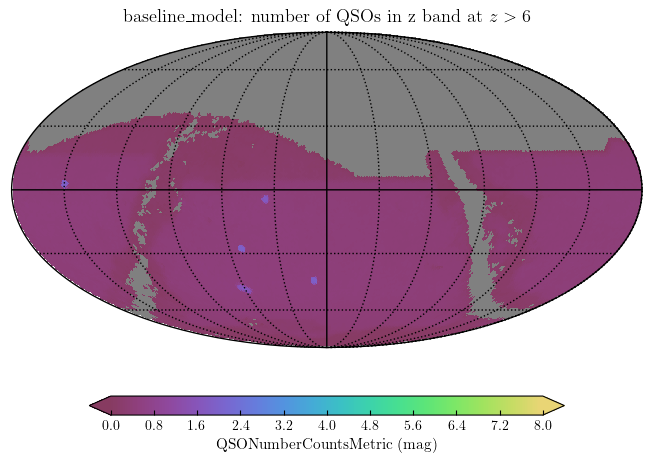

In [189]:
# count QSOs detected in y filter with a redshift of 6 or greater
qsos_metric = maf.QSONumberCountsMetric(lsst_filter="z", zmin=6)
base_bundle_mag = maf.MetricBundle(
    qsos_metric,
    slicer,
    "filter = 'z'",
    run_name=baseline_run_name,
)
bg = maf.MetricBundleGroup([base_bundle_mag], baseline_run_path, out_dir=data_dir)
bg.run_all()

ph = maf.PlotHandler(out_dir=data_dir, thumbnail=False, fig_format="png")
ph.set_metric_bundles([base_bundle_mag])

plot_dict = {
    "extend": "both",
    "title": "baseline_model:  number of QSOs in z band at $z > 6$",
    "color_min": 0,
    "color_max": 8,
}
fig = ph.plot(plot_func=maf.HealpixSkyMap(), plot_dicts=plot_dict)
plt.savefig("qsos_z.png", dpi=300, bbox_inches="tight")
plt.show()

# We can see now how different plans affect the numbers

for a 10 year baseline, we know

| Filter | Visits | Single-Visit Depth (mag) | Coadded Depth (mag) | Total Exposure Time (sec) |
| ------ | ------ | ------------------------ | ------------------- | ------------------------- |
| **u**  | 56     | 23.9                     | 26.1                | 1,680                     |
| **g**  | 80     | 25.0                     | 27.4                | 2,400                     |
| **r**  | 184    | 24.7                     | 27.5                | 5,520                     |
| **i**  | 184    | 24.0                     | 26.8                | 5,520                     |
| **z**  | 160    | 23.3                     | 26.1                | 4,800                     |
| **y**  | 160    | 22.1                     | 24.9                | 4,800                     |
                |


In [190]:
from astropy.cosmology import Planck18 as cosmo
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import z_at_value


def max_redshift(L_agn, exposure_s, band="r"):
    """
    For a given AGN bolometric luminosity, exposure time, and LSST band,
    compute the maximum redshift at which the object can be detected
    based on the limiting magnitude.

    Parameters:
    - L_agn : float, luminosity in erg/s (bolometric)
    - exposure_s : float, exposure time in seconds
    - band : str, LSST filter band ('u', 'g', 'r', 'i', 'z', 'y')

    Returns:
    - z_max : float, estimated maximum redshift
    - m_lim : float, limiting magnitude after exposure scaling
    - M_bol : float, AGN bolometric absolute magnitude
    """

    # Approximate 5σ coadded depths from 10-year LSST WFD survey
    band_dict_mag_depth = {
        "u": 26.1,
        "g": 27.4,
        "r": 27.5,
        "i": 26.8,
        "z": 26.1,
        "y": 24.9,
    }

    # Approximate total exposure time per band (visits × 30s)
    band_dict_exp_time_total = {
        "u": 56 * 15 * 2,
        "g": 80 * 15 * 2,
        "r": 184 * 15 * 2,
        "i": 184 * 15 * 2,
        "z": 160 * 15 * 2,
        "y": 160 * 15 * 2,
    }

    # use band-specific total time and depth
    t_ref = band_dict_exp_time_total[band]
    mag_depth = band_dict_mag_depth[band]

    # scale limiting magnitude for shorter/longer exposure
    # the maximum magnitude an object can be detected at 5 sigma
    m_lim = mag_depth + 1.25 * np.log10(exposure_s / t_ref)

    print("New limiting magnitude:", round(m_lim, 2))

    # convert AGN bolometric luminosity to absolute bolometric magnitude
    lum_sun_erg_s = const.L_sun.to(u.erg / u.s).value
    # convert to absolute magnitude in all wave lengths
    m_bol = -2.5 * np.log10(L_agn / lum_sun_erg_s) + 4.74
    print("Bolometric absolute magnitude of AGN:", m_bol)

    # 'distance modulus' is the difference between the apparent magnitude and absolute magnitude of a celestial object
    mu = m_lim - m_bol
    D_L_pc = 10 ** ((mu + 5) / 5)
    D_L = D_L_pc * u.pc
    print("Lumnosity distance: {:} Gpc".format(D_L.to(u.Gpc).value))
    # Convert luminosity distance to redshift using cosmology
    z_max = z_at_value(cosmo.luminosity_distance, D_L)

    return z_max, m_lim, m_bol


L_example = 1e45  # erg/s
z_max, mlim, Mbol = max_redshift(L_example, exposure_s=4800 * 4, band="y")
print(f"Max redshift: z = {z_max}, Limiting mag = {mlim}, M_bol = {Mbol}")

New limiting magnitude: 25.65
Bolometric absolute magnitude of AGN: -23.802570177237982
Lumnosity distance: 77.80885657642062 Gpc
Max redshift: z = 7.627220672971334 redshift, Limiting mag = 25.65257498915995, M_bol = -23.802570177237982


In [191]:
u_visits, g_visits, r_visits, i_visits, z_visits, y_visits = 56, 80, 184, 184, 160, 160
# total survey time per spot in the sky, in 10 years
total_survey_wfd_seconds = (
    2 * 15 * u_visits
    + 2 * 15 * g_visits
    + 2 * 15 * r_visits
    + 2 * 15 * i_visits
    + 2 * 15 * z_visits
    + 2 * 15 * y_visits
)
current_wfd_y_exposure_s = 4800
print(
    "Total survey time in seconds for WFD in 10 years for each spot:",
    total_survey_wfd_seconds,
)
fraction_spent_on_y = current_wfd_y_exposure_s / total_survey_wfd_seconds
print("fraction of time spent on y band:", fraction_spent_on_y)

Total survey time in seconds for WFD in 10 years for each spot: 24720
fraction of time spent on y band: 0.1941747572815534


In [192]:
# median, including shutter read out and slew time each visit
visit_time_no_exposure = 39
# we take 2 frames each visit, full visit time
time_spent_not_taking_image = visit_time_no_exposure * (total_survey_wfd_seconds / 2)

# 2 minutes to change filters, there are 6 filters
filter_exchange_time = (
    2 * 60 * (u_visits + g_visits + r_visits + i_visits + z_visits + y_visits) / 6
)

full_survey_time = (
    total_survey_wfd_seconds + time_spent_not_taking_image + filter_exchange_time
)

New limiting magnitude: 24.9
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.501917012155852 Gpc
New limiting magnitude: 24.91
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.521211564404987 Gpc
New limiting magnitude: 24.92
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.540573780296753 Gpc
New limiting magnitude: 24.92
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.5600038971193175 Gpc
New limiting magnitude: 24.93
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.5795021529929 Gpc
New limiting magnitude: 24.94
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.599068786872938 Gpc
New limiting magnitude: 24.95
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumnosity distance: 5.618704038552672 Gpc
New limiting magnitude: 24.95
Bolometric absolute magnitude of AGN: -18.802570177237982
Lumn

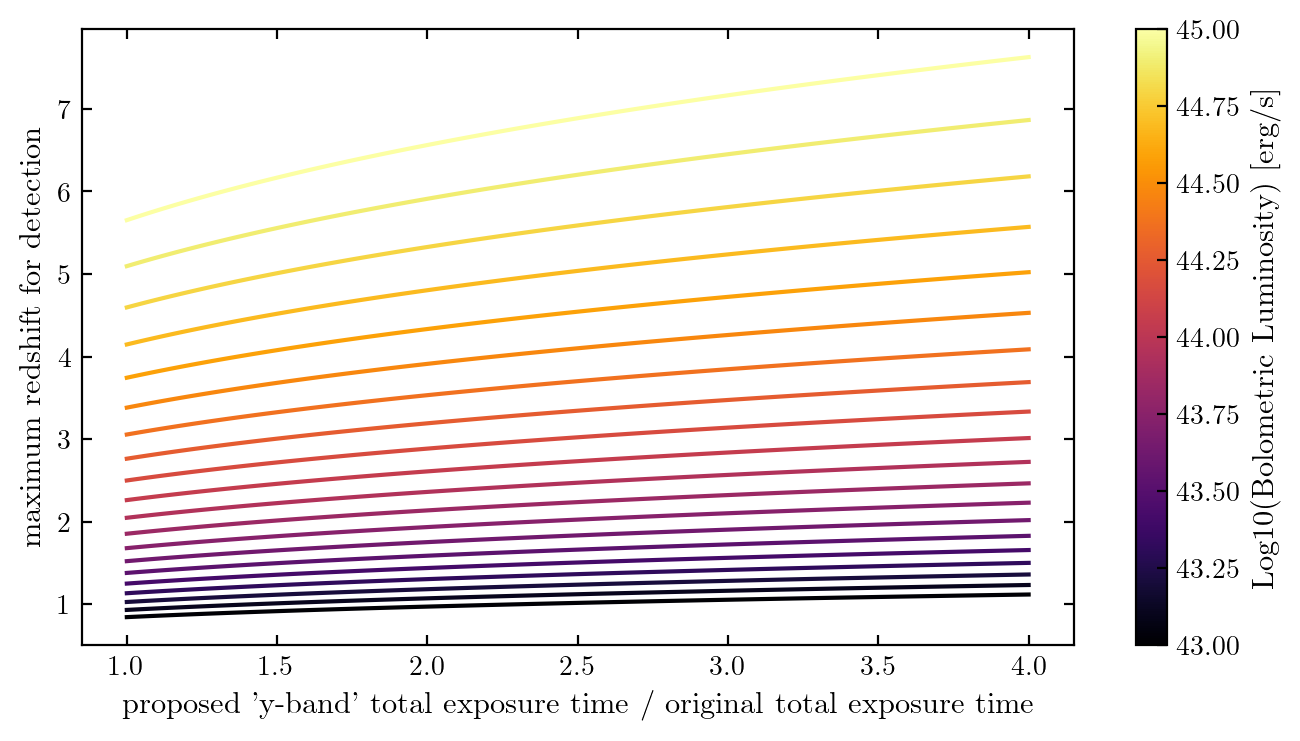

In [193]:
# now we can see how the max redshift changes as a fuynction of time for different AGN luminosities
agn_bols = np.geomspace(1e43, 1e45, 20)  # erg/s

fig, ax = plt.subplots(figsize=(8, 4), dpi=200)
t_exposure = np.geomspace(1, 4, 100) * 4800
norm = plt.Normalize(vmin=np.log10(agn_bols.min()), vmax=np.log10(agn_bols.max()))
cmap = plt.cm.inferno

for i, L_agn in enumerate(agn_bols):
    z_maxs = []
    for t in t_exposure:
        z_max, mlim, Mbol = max_redshift(L_agn, t, band="y")
        z_maxs.append(z_max)
    ax.plot(
        t_exposure / 4800,
        z_maxs,
        color=cmap(norm(np.log10(L_agn))),
        label=f"L_agn={L_agn:.1e}",
    )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Log10(Bolometric Luminosity) [erg/s]")

ax.set_xlabel("proposed 'y-band' total exposure time / original total exposure time")
ax.set_ylabel("maximum redshift for detection")

plt.savefig("exposure_z.png", dpi=300, bbox_inches="tight")
plt.show()

In [199]:
total_observing_time = 30 * 5.6e6  # seconds
my_observing_time = total_observing_time * 0.1
print("Total observing time in 10 years: {:2e} seconds".format(total_observing_time))
print("My observing time in 10 years: {:2e} seconds".format(my_observing_time))

Total observing time in 10 years: 1.680000e+08 seconds
My observing time in 10 years: 1.680000e+07 seconds


In [201]:
number_of_seconds_per_band = my_observing_time / (2 * 4800)

1750.0